In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pwd
%cd /content/drive/MyDrive/Colab Notebooks
!git clone https://github.com/mirzaaa101/BengaliSent-A-Multi-Domain-Bangla-Sentiment-Analysis-Dataset.git

/content
/content/drive/MyDrive/Colab Notebooks
fatal: destination path 'BengaliSent-A-Multi-Domain-Bangla-Sentiment-Analysis-Dataset' already exists and is not an empty directory.


In [9]:
import pandas as pd

ROOT = "/content/drive/MyDrive/Colab Notebooks/BengaliSent-A-Multi-Domain-Bangla-Sentiment-Analysis-Dataset"
df = pd.read_csv(f"{ROOT}/BengaliSent_Annotated.csv")
df.head()

,Comment,Sentiment
0,২০২৪কে কে শুনেছেন লাইক করবেন,Positive
1,২০১৮ সালে এই গানটি শুনি আজকে আবার শুনলাম,Positive
2,আমি এ গানে নাচ করছি,Positive
3,অনেক দিন পর গান টার কথা মনে পরলো সুনতে আইলাম য...,Positive
4,আজকে সৃতি রেখে গেলাম কমেন্ট করে,Positive


**Looking at the Class Distribution**

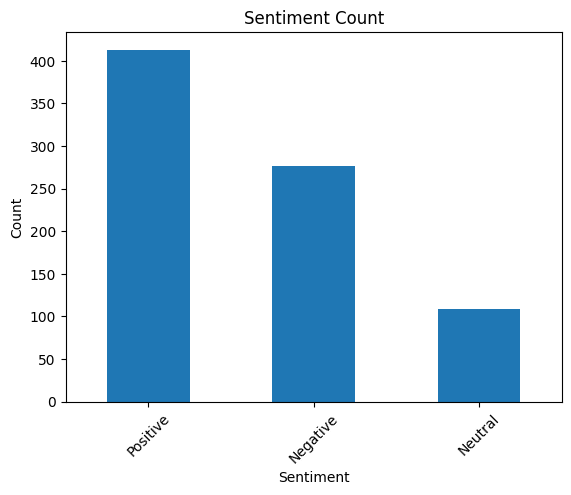

In [13]:
import matplotlib.pyplot as plt

df["Sentiment"].value_counts().plot(kind="bar", rot=45, title="Sentiment Count")
plt.ylabel("Count")
plt.show()

**How Long Each Comments**

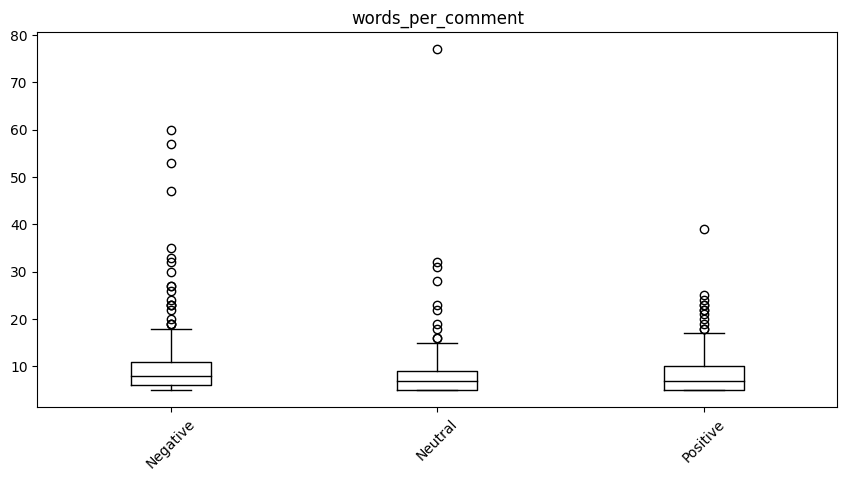

In [5]:
df["words_per_comment"] = df["Comment"].apply(lambda x: len(x.split()))
df.boxplot("words_per_comment", by="Sentiment", rot=45, figsize=(10, 5), grid=False, color="black")
df.drop("words_per_comment", axis=1, inplace=True)
plt.suptitle("")
plt.xlabel("")
plt.show()

**Convert DataFrame to Datasets**

In [6]:
!pip install datasets

In [14]:
from datasets import Dataset, DatasetDict, ClassLabel

dataset = Dataset.from_pandas(df)

class_label = ClassLabel(names=list(df['Sentiment'].unique()))
dataset = dataset.cast_column('Sentiment', class_label)

train_test_split = dataset.train_test_split(test_size=0.3, stratify_by_column='Sentiment')
valid_test_split = train_test_split['test'].train_test_split(test_size=0.5, stratify_by_column='Sentiment')

bengali_sent = DatasetDict({
    'train': train_test_split['train'],
    'validation': valid_test_split['train'],
    'test': valid_test_split['test']
})
print(bengali_sent)

Casting the dataset:   0%|          | 0/799 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Comment', 'Sentiment'],
        num_rows: 559
    })
    validation: Dataset({
        features: ['Comment', 'Sentiment'],
        num_rows: 120
    })
    test: Dataset({
        features: ['Comment', 'Sentiment'],
        num_rows: 120
    })
})


In [16]:
train_ds = bengali_sent["train"]
valid_ds = bengali_sent["validation"]
test_ds = bengali_sent["test"]

**Push The Dataset Into HuggingFace**

In [17]:
from huggingface_hub import notebook_login

notebook_login()

In [19]:
bengali_sent.push_to_hub("mirzaaa10/bengali_sent")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mirzaaa10/bengali_sent/commit/5460913b46fdfd1e316e22af07766303fa57adda', commit_message='Upload dataset', commit_description='', oid='5460913b46fdfd1e316e22af07766303fa57adda', pr_url=None, pr_revision=None, pr_num=None)

In [23]:
from datasets import load_dataset

ds = load_dataset("mirzaaa10/bengali_sent")
print(ds)

README.md:   0%|          | 0.00/3.03k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/30.9k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/8.74k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/559 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/120 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/120 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Comment', 'Sentiment'],
        num_rows: 559
    })
    validation: Dataset({
        features: ['Comment', 'Sentiment'],
        num_rows: 120
    })
    test: Dataset({
        features: ['Comment', 'Sentiment'],
        num_rows: 120
    })
})
